## Python for Data Science: Final Assignment

### Webscraping

#### Step 1: Define a Webscraping function

In [ ]:
import bs4
import requests
import pandas as pd
import numpy as np
import boto3

In [7]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # read the webpage 
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML  
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable'; 
    #therefore we create a tag object "table"
    table=soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row  
    headers=table.tr
    #the table column names are displayed  as an abbreviation; therefore we find all the abbr tags and returs an Iterator
    titles=headers.find_all("abbr")
    #we create a dictionary  and pass the table headers as the keys 
    data = {title['title']:[] for title in titles}
   #we will store each column as a list in a dictionary, the header of the column will be the dictionary key 

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
    
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n 
        for key,a in zip(data.keys(),row.find_all("td")[2:]):
            # we append each elment and strip any extra HTML contnet 
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == ".")))

    # we remove extra rows by finding the smallest list     
    Min=min([len(x)  for x in data.values()])
    #we convert the elements in the key to floats 
    for key in data.keys():
        data[key]=list(map(lambda x: float(x), data[key][:Min]))
       
    return data

### Step 2: Web Scraping the data and Converting to Pandas Dataframe

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [9]:
# List 1 contains the links to the Wikipedia article for each player.List 2 contains the names of each player.

links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']
names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']

In [10]:
# For each Player create a Python dictionary from the table Regular season table

michael_jordan_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Michael_Jordan')

kobe_bryant_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Kobe_Bryant')

lebron_james_dict=get_basketball_stats('https://en.wikipedia.org/wiki/LeBron_James')

stephen_curry_dict=get_basketball_stats('https://en.wikipedia.org/wiki/Stephen_Curry')

In [12]:
# For each Player convert the Python Dictionary to a Pandas Dataframe

michael_jordan = pd.DataFrame(michael_jordan_dict)

kobe_bryant = pd.DataFrame(kobe_bryant_dict) 

lebron_james = pd.DataFrame(lebron_james_dict) 

stephen_curry = pd.DataFrame(stephen_curry_dict) 

In [13]:
# For each player display the first five columns of the Dataframe, print the name of each Player above the Dataframe

print('Michael Jordan')
print(michael_jordan.head())

print('Kobe Bryant')
print(kobe_bryant.head())

print('Lebron James')
print(lebron_james.head())

print('Stephen Curry')
print(stephen_curry.head())

Michael Jordan
   Games played  Games started  Minutes per game  Field goal percentage  \
0          82.0           82.0              38.3                  0.515   
1          18.0            7.0              25.1                  0.457   
2          82.0           82.0              40.0                  0.482   
3          82.0           82.0              40.4                  0.535   
4          81.0           81.0              40.2                  0.538   

   3-point field-goal percentage  Free-throw percentage  Rebounds per game  \
0                          0.173                  0.845                6.5   
1                          0.167                  0.840                3.6   
2                          0.182                  0.857                5.2   
3                          0.132                  0.841                5.5   
4                          0.276                  0.850                8.0   

   Assists per game  Steals per game  Blocks per game  Points per

### Step 3: Plot the Points per game for a player

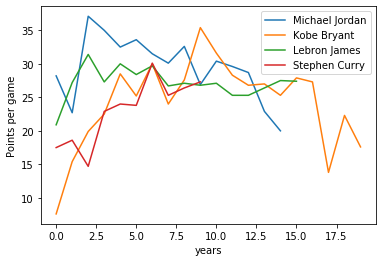

In [14]:
import matplotlib.pyplot as plt

names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']
data_frame = [michael_jordan,kobe_bryant,lebron_james,stephen_curry]

for (n,d) in zip(names,data_frame):
    plt.plot(d[['Points per game']],label=n)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')